In this project I evaluated several exams performed by a group of patients who are in a Heart attack study.

After the data cleaning process, I applied ANOVA to remove non-significant features and tested several classification models to try to predict which of these patients are more susceptible to the disease.


With the model selected, I created a function to find the best hyperparameters that maximize the result of the model.

### Features: 
#### the medical description of all features was achieved with the help of some discussions on Kaggle 
- **Age** : Age of the patient
- **Sex** : Sex of the patient
- **cp** : Chest Pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- **trtbps** : resting blood pressure (in mm Hg)
- **chol** : cholesterol in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl)
    - 0: False
    - 1: True
- **rest_ecg** : resting electrocardiographic result
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** : maximum heart rate achieved
- **exang** : exercise induced angina
    - 0: No
    - 1: Yes
- **old peak** : ST depression induced by exercise relative to rest
- **slp** : the slope of the peak exercise ST segment
    - 0: unsloping
    - 1: flat
    - 2: downsloping
- **caa** : number of major vessels (0-3)
- **thall** : thalassemia
    - 0: null
    - 1: fixed defect
    - 2: normal
    - 3: reversable defect
- **output**: diagnosis of heart disease (angiographic disease status)
    - 0: < 50% diameter narrowing. less chance of heart disease
    - 1: > 50% diameter narrowing. more chance of heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.metrics import auc, precision_recall_curve, log_loss,recall_score, precision_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df_heart = df = pd.read_csv("heart.csv")
df_saturation = pd.read_csv("o2Saturation.csv")

### Let´s analyse the dataset

In [3]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# let´s check if the dataset is balanced 

df_heart['output'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: output, dtype: float64

We can realize that the data arent unbalanced , so we don´t need to reajust this part

In [7]:
# check if we have null values
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Analysing the Features

In [8]:
# Based in the Features description we can divide then into this two categories:
numeric_col=['age' , 'trtbps' , 'chol', 'thalachh', 'oldpeak']
categorical_col=['sex', 'cp','fbs','restecg', 'exng', 'slp', 'caa','thall']

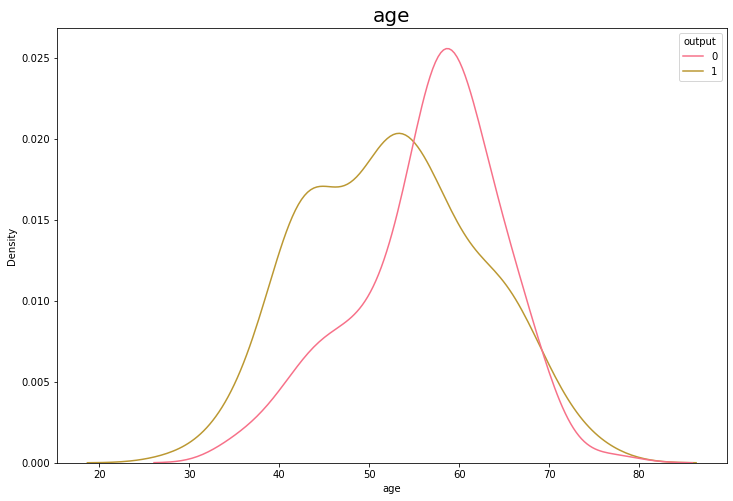

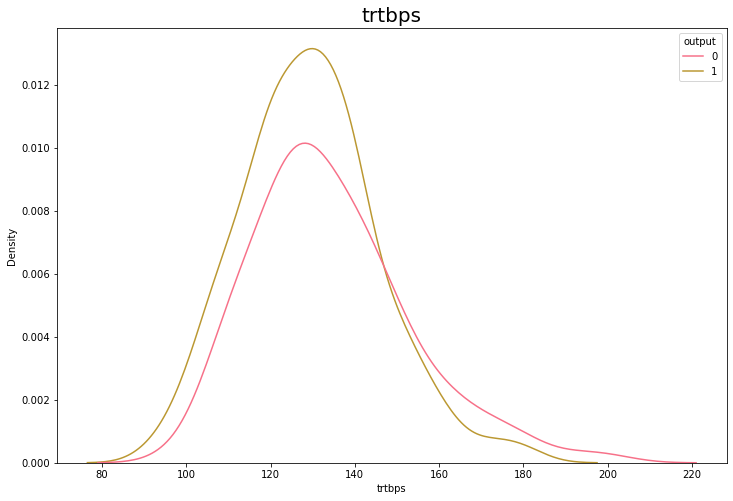

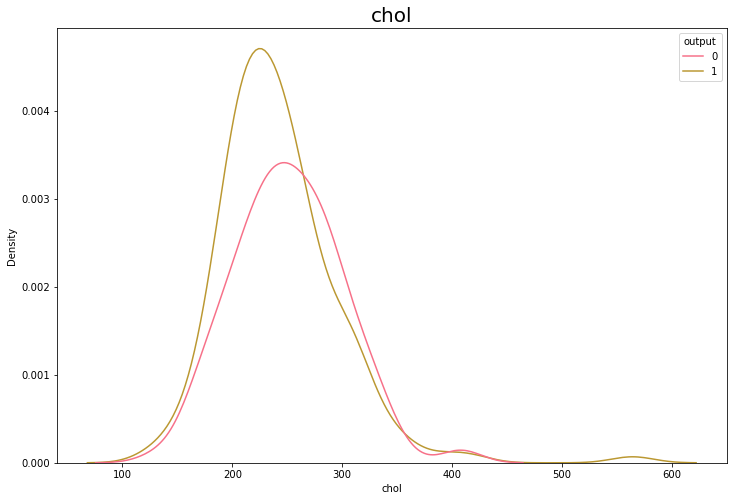

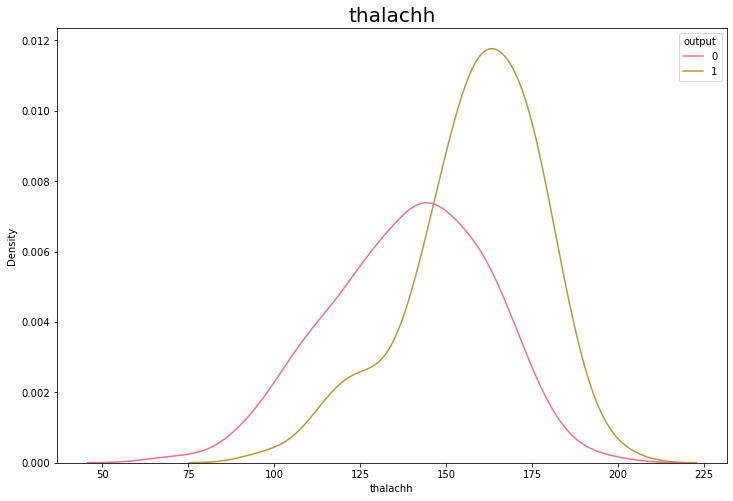

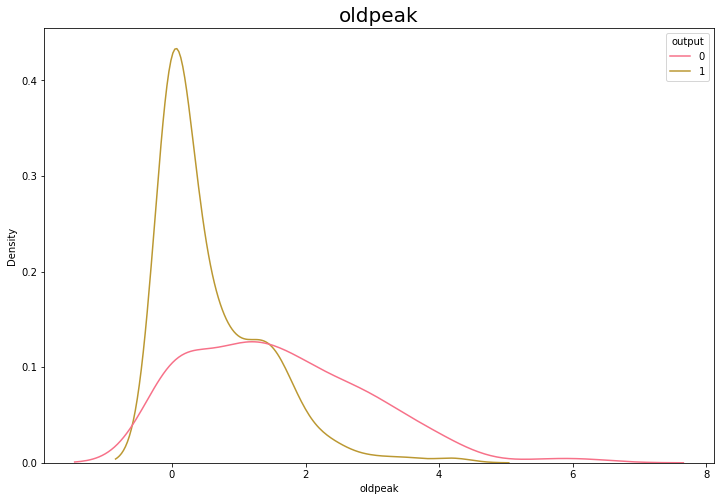

In [9]:
# Analasing all the Numeric Features

for i in numeric_col:
    plt.figure(figsize=(12,8))
    sns.kdeplot(i,hue='output',data=df_heart)
    plt.title(i,size=20)

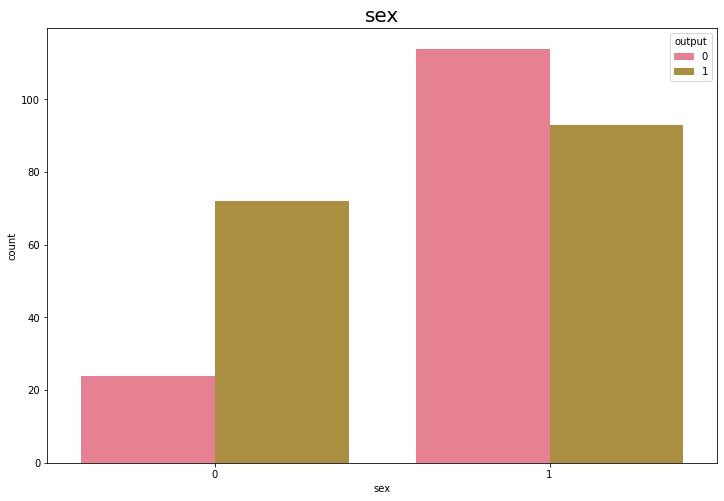

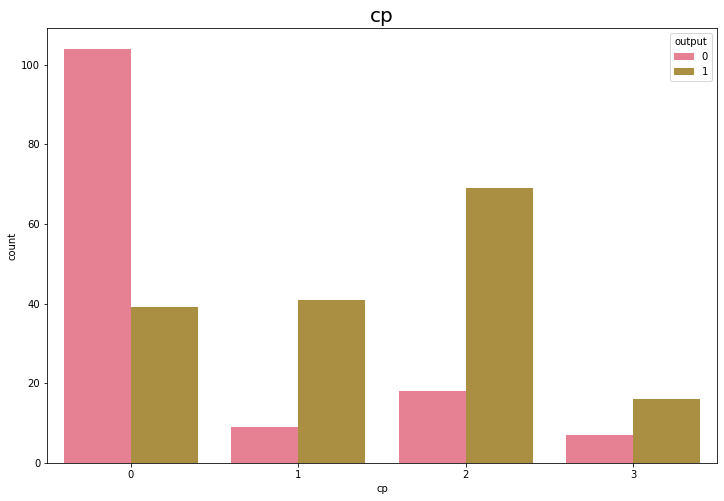

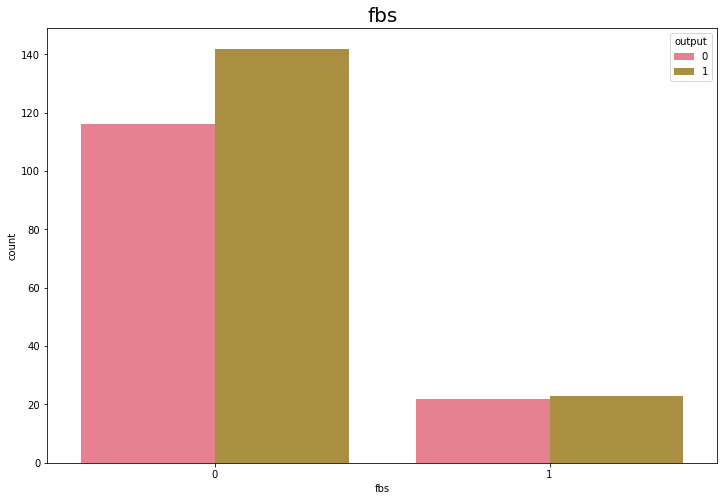

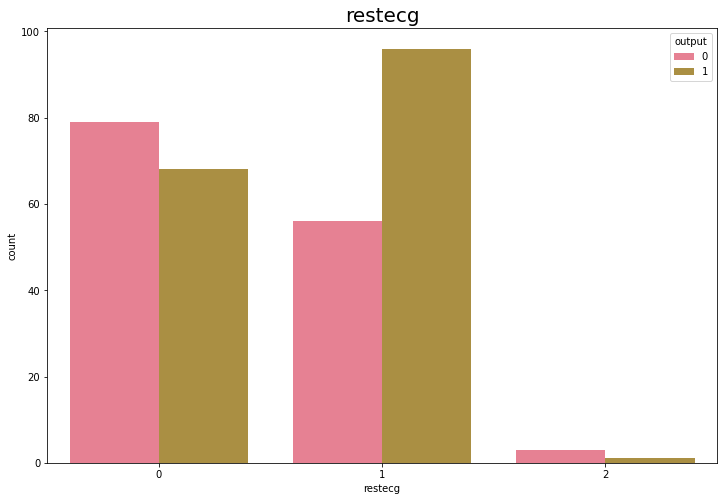

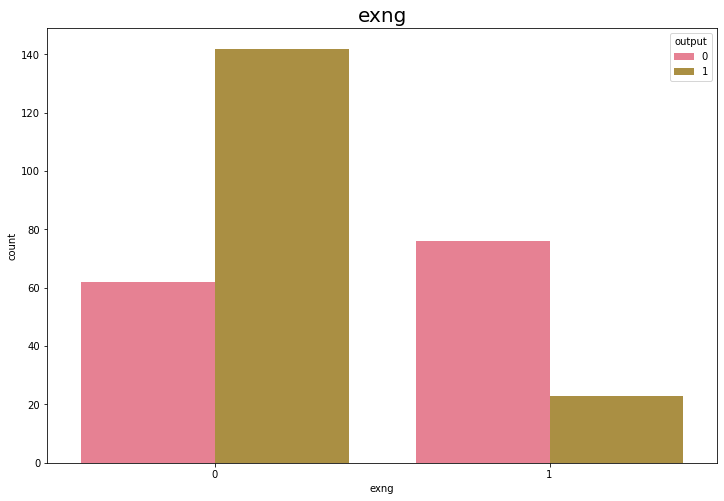

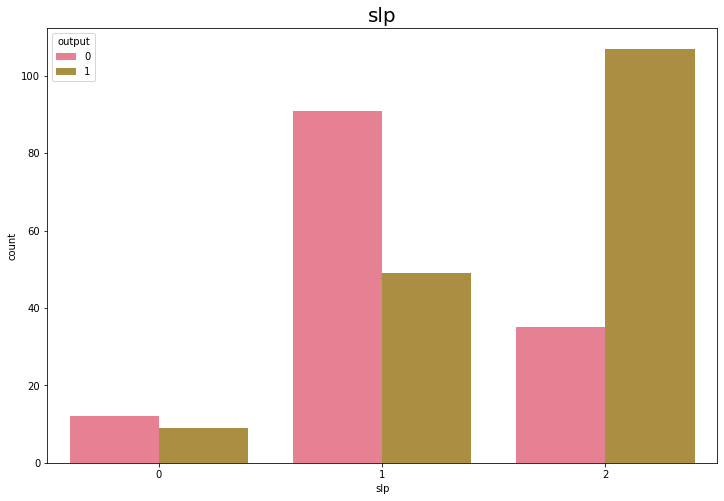

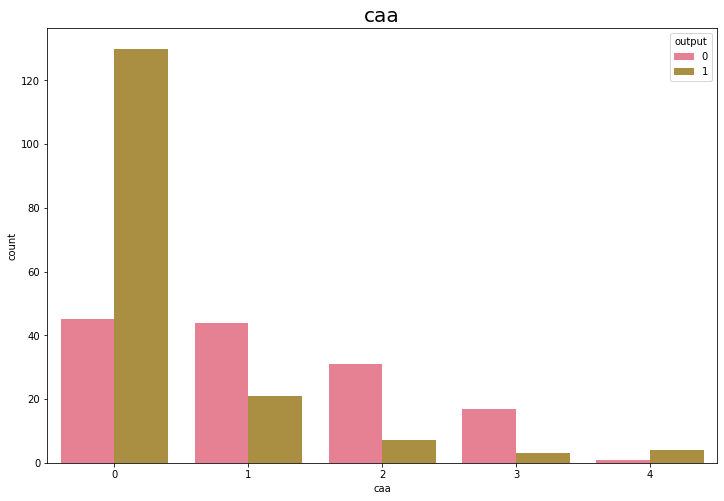

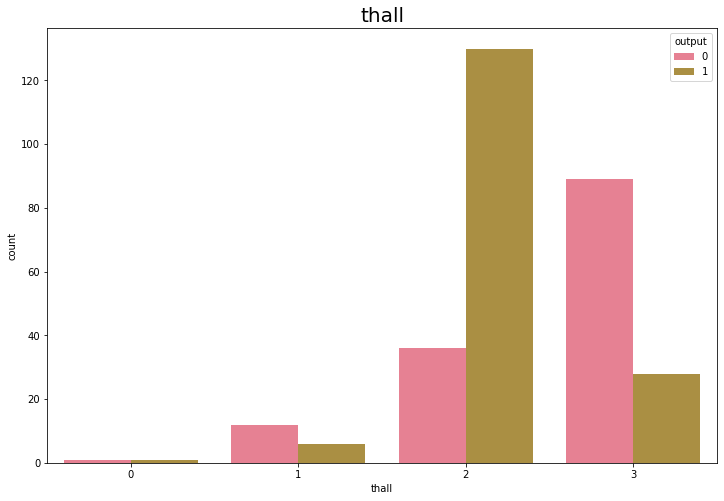

In [10]:
# Analasing all the Categorical Features

for i in categorical_col:
    plt.figure(figsize=(12,8))
    sns.countplot(i,hue='output',data=df_heart)
    plt.title(i,size=20)

### Correlations

<AxesSubplot:>

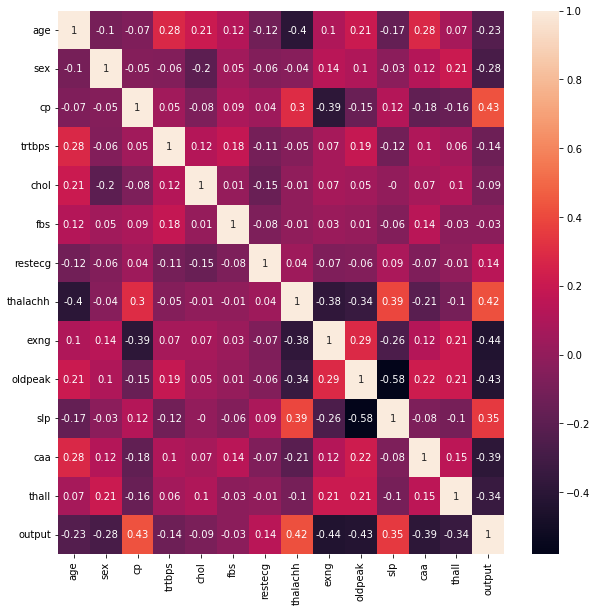

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df_heart.corr(),2) , annot = True)

### Train and Test

In [12]:
X , y = df_heart.drop('output' , axis = 1), df_heart['output']



X_train , X_test , y_train , y_test= train_test_split(X, y,
                                                      stratify=y,
                                                      test_size=0.3, 
                                                      random_state=123)

### ANOVA

In [13]:
selected_anova = f_classif(X_train , y_train)
p_values = pd.Series(selected_anova[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True , inplace = True)

In [14]:
significant_cols = []

# Considering a significance level of 5%, we will only select the variables that have a p value less than that. 
for col in p_values.index:
    if p_values[col] < 0.05:
        significant_cols.append(col)
        # Keep the feature in X_train and X_test
    else:
        X_train.drop(col , axis=1, inplace = True)
        X_test.drop(col, axis =1, inplace = True)
        

print(f'significant features:', significant_cols)

significant features: ['exng', 'oldpeak', 'cp', 'thalachh', 'caa', 'slp', 'thall', 'sex', 'trtbps', 'restecg']


### Creating pre processor Pipeline

In [15]:
num_columns = X_train.select_dtypes(exclude=['object']).columns.tolist()
# selecting just de numeric columns to use the StandardScaler preprocessor.
# I know in this dataset all the columns are numeric, but creating this kind of seccion is a good practice

In [16]:
pipeline_columns = ('Standard_Scaler',MinMaxScaler(), num_columns)
pre_processador = ColumnTransformer(pipeline_columns)

pipeline_columns

('Standard_Scaler',
 MinMaxScaler(),
 ['sex',
  'cp',
  'trtbps',
  'restecg',
  'thalachh',
  'exng',
  'oldpeak',
  'slp',
  'caa',
  'thall'])

In [17]:
X_train[['sex' , 'cp' , 'trtbps' , 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp','caa','thall']] =  MinMaxScaler().fit_transform(X_train[['sex' , 'cp' , 'trtbps' , 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp','caa','thall']])

### Trying Some Models

We gonna try some models and then apply some validation techniques.


in this first step we gonna use all the features we have. When we have our best model, we can select the best features and tune our model

In [18]:
model_reglog = Pipeline(steps=[('model' , LogisticRegression(max_iter=5000, random_state =42))])
model_svm = Pipeline(steps=[('model', SVC(kernel='rbf', probability=True, random_state=42))])
model_knn = Pipeline(steps=[('model', KNeighborsClassifier())])
model_dt = Pipeline(steps=[('model', DecisionTreeClassifier(max_depth=5,random_state=42))])
model_rf = Pipeline(steps=[('model', RandomForestClassifier(max_depth=5,random_state=42))])

In [19]:
classifiers = [model_reglog, model_svm, model_knn, model_dt, model_rf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print(type(classifier['model']).__name__,'\n')
    print(f'log_loss treino: {log_loss(y_train, classifier.predict_proba(X_train)[:,1])}')
    print(f'log_loss teste: {log_loss(y_test, classifier.predict_proba(X_test)[:,1])}')
    print(100*'-')

LogisticRegression 

log_loss treino: 0.3703370126143674
log_loss teste: 12.363829691283474
----------------------------------------------------------------------------------------------------
SVC 

log_loss treino: 0.3144357992815413
log_loss teste: 0.6931471805599454
----------------------------------------------------------------------------------------------------
KNeighborsClassifier 

log_loss treino: 0.2896891234795289
log_loss teste: 0.694378233659732
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier 

log_loss treino: 0.17269578047287723
log_loss teste: 15.484643418064302
----------------------------------------------------------------------------------------------------
RandomForestClassifier 

log_loss treino: 0.24102293717399348
log_loss teste: 0.6014739579776042
----------------------------------------------------------------------------------------------------


### Evalueting the first approach

In [20]:
model_rf.fit(X_train, y_train)
y_pred_train = model_rf.predict(X_train)
y_pred = model_rf.predict(X_test)


In [21]:
print("Train Accuracy:" , metrics.accuracy_score(y_train,y_pred_train))
print("Train Precision:",metrics.precision_score(y_train,y_pred_train))
print("Train Recall:",metrics.recall_score(y_train,y_pred_train))

Train Accuracy: 0.9433962264150944
Train Precision: 0.9327731092436975
Train Recall: 0.9652173913043478


In [22]:
print("Test Accuracy:" , metrics.accuracy_score(y_test,y_pred))
print("Test Precision:",metrics.precision_score(y_test,y_pred))
print("Test Recall:",metrics.recall_score(y_test,y_pred))

Test Accuracy: 0.6483516483516484
Test Precision: 0.9090909090909091
Test Recall: 0.4


### Tuning the model

let´s create a function that performs a grid search over several hyperparameters for the RandomForestClassifier and show us the best hyperparameters found

In [23]:
def tune_model(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(random_state=42)
    pipe = Pipeline(steps=[('model', rf)])

    param_grid = {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    }

    search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)
    search.fit(X_train, y_train)

    model_rf2 = search.best_estimator_
    model_rf2.fit(X_train, y_train)

    print(f'Best parameters: {search.best_params_}')
    print(f'log_loss treino: {log_loss(y_train, model_rf2.predict_proba(X_train)[:,1])}')
    print(f'log_loss teste: {log_loss(y_test, model_rf2.predict_proba(X_test)[:,1])}')

    return model_rf2

In [24]:
best_model = tune_model(X_train, y_train, X_test, y_test)

Best parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 50}
log_loss treino: 0.29419686785192706
log_loss teste: 0.5064732001196094


In [25]:
# Applying the best hyperparameters found into your model
best_model = Pipeline(steps=[('model', RandomForestClassifier(max_depth=5,
                                                              min_samples_leaf = 4,
                                                              min_samples_split= 2 ,
                                                              n_estimators= 50,
                                                              random_state=42))])
best_model.fit(X_train, y_train)

# Predicting the new results for your train and test datasets
y_best_pred_train = best_model.predict(X_train)
y_best_pred = best_model.predict(X_test)


print("Train Accuracy:" , metrics.accuracy_score(y_train,y_best_pred_train))
print("Train Precision:",metrics.precision_score(y_train,y_best_pred_train))
print("Train Recall:",metrics.recall_score(y_train,y_best_pred_train))

Train Accuracy: 0.910377358490566
Train Precision: 0.9
Train Recall: 0.9391304347826087


In [26]:
print("Test Accuracy:" , metrics.accuracy_score(y_test,y_best_pred))
print("Test Precision:",metrics.precision_score(y_test,y_best_pred))
print("Test Recall:",metrics.recall_score(y_test,y_best_pred))

Test Accuracy: 0.6923076923076923
Test Precision: 0.8928571428571429
Test Recall: 0.5
